# 7_ 2 - MODELO DE EJECUCIÓN CON LOS DATOS DE PRUEBA CON ÁRBOL DE DECISIÓN

En este notebook vamos a cargar el dataset de prueba y realizaremos la calidad de datos, separaremos predictoras y target, predeciremos sobre los datos de prueba y evaluaremos el modelo definitivo.

## IMPORTAR LOS PAQUETES

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scikitplot as skplt 

#transformación de datos
from sklearn.preprocessing import OrdinalEncoder

#modelo

from sklearn.tree import DecisionTreeClassifier

#metricas de evaluación
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Crear Pipeline
from sklearn.pipeline import make_pipeline

import cloudpickle

## CARGAR LOS DATOS

In [3]:
df = pd.read_csv('../../02_Datos/02_Validacion/prueba.csv', index_col= 0)
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,target
190,N,N,N,N,N,N,B
10,P,P,P,P,A,P,NB
191,P,N,N,N,A,A,B
168,A,A,N,N,N,N,B
130,A,A,A,A,P,A,NB
...,...,...,...,...,...,...,...
60,A,A,A,P,P,A,NB
37,A,N,A,P,P,A,NB
22,A,A,A,A,P,A,NB
77,A,P,A,P,A,P,NB


## TRANSFORMACIÓN DE DATOS

### Variables a aplicar Ordinal Encoder

In [4]:
var_oe = ['industrial_risk',
            'management_risk',
            'financial_flexibility',
            'credibility',
            'competitiveness',
            'operating_risk']


### Orden y categoría de las variables

In [5]:
orden_industrial = ['N','A','P']
orden_management = ['N','A','P']
orden_financial = ['N','A','P']
orden_credibility = ['N','A','P']
orden_competitiveness = ['N','A','P']
orden_operating = ['N','A','P']

categorias = [orden_industrial,
              orden_management,
              orden_financial,
              orden_credibility,
              orden_competitiveness,
              orden_operating]


### Instanciar Ordinal Encoder

In [6]:
oe = OrdinalEncoder(categories= categorias, 
                    handle_unknown= 'use_encoded_value',
                    unknown_value= -99)

### Entrenar y aplicar

In [7]:
df_oe = oe.fit_transform(df[var_oe])

In [8]:
nombre_oe = [variable + '_oe' for variable in var_oe]
x = pd.DataFrame(df_oe, columns= nombre_oe)
x

,industrial_risk_oe,management_risk_oe,financial_flexibility_oe,credibility_oe,competitiveness_oe,operating_risk_oe
0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,2.0,2.0,2.0,1.0,2.0
2,2.0,0.0,0.0,0.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,2.0,1.0
...,...,...,...,...,...,...
57,1.0,1.0,1.0,2.0,2.0,1.0
58,1.0,0.0,1.0,2.0,2.0,1.0
59,1.0,1.0,1.0,1.0,2.0,1.0
60,1.0,2.0,1.0,2.0,1.0,2.0


## APLICAR TRANSFORMACIÓN BINARIA A LA TARGET

In [9]:
y = df.target.replace({'B':1 , 'NB': 0}).reset_index().copy()
y.drop(columns= 'index', inplace= True)
y

,target
0,1
1,0
2,1
3,1
4,0
...,...
57,0
58,0
59,0
60,0


## MODELIZAR CON EL PIPE DE EJECUCIÓN

### CARGAMOS EL PIPE DE EJECUCIÓN

In [10]:
modelo = pd.read_pickle('../../04_Modelos/pipe_ejecucion_7_v0.pickle')

In [18]:
modelo.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])>

## PREDECIR Y EVALUAR CON LOS DATOS DE PRUEBA

### PREDECIR SOBRE LOS DATOS

In [11]:
pred = modelo.predict(x)
pred_proba = modelo.predict_proba(x)[:,1]

### EVALUAR SOBRE LOS DATOS

In [12]:
v_roc_auc_proba = roc_auc_score(y, pred_proba)
v_roc_auc = roc_auc_score(y, pred)
v_accuracy = accuracy_score(y, pred)
v_report = classification_report(y, pred)

#print(f"Roc AUC_proba: {v_roc_auc_proba}")
print(f"Roc AUC: {v_roc_auc}")
print(f"Accuracy: {v_accuracy}")
print(f"Classification Report:\n{v_report}")

Roc AUC: 0.9874999999999999
Accuracy: 0.9838709677419355
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.96      1.00      0.98        22

    accuracy                           0.98        62
   macro avg       0.98      0.99      0.98        62
weighted avg       0.98      0.98      0.98        62



## REPORTING DEL MODELO

Matrix de Confusión MultiClass

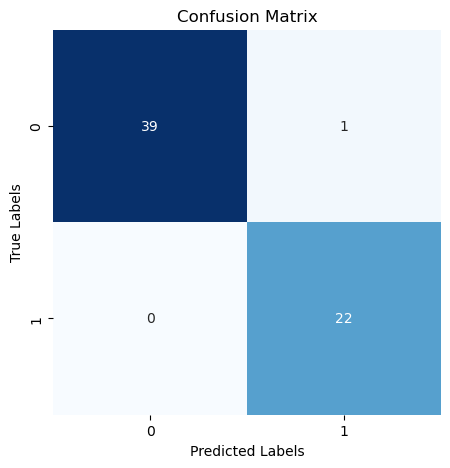

In [13]:
# Calcular la matriz de confusión
cm = confusion_matrix(y, pred)


# Crear un mapa de calor de la matriz de confusión
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)

# Configurar etiquetas y título del gráfico
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix");


### Precision-Recall

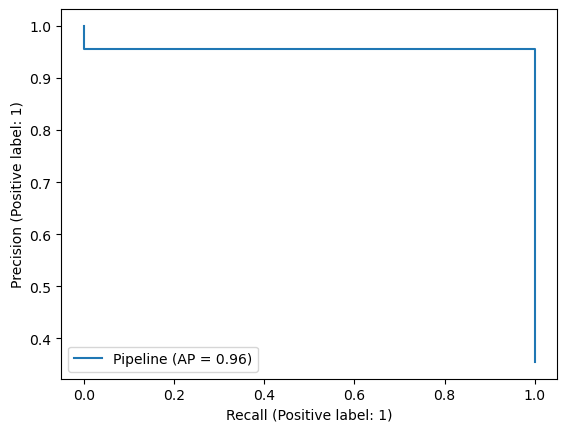

In [14]:
PrecisionRecallDisplay.from_estimator(modelo, x, y);

### ROC Chart

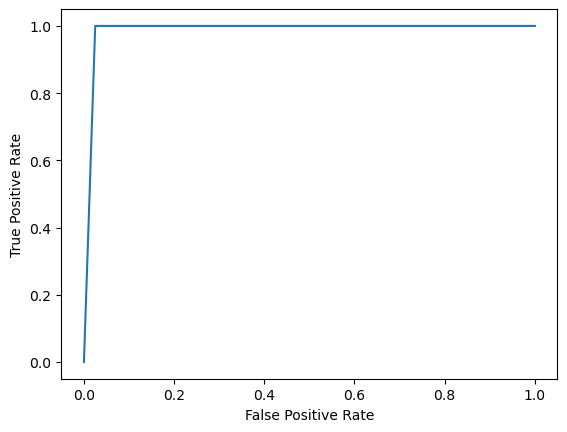

In [17]:
y_score = modelo.predict_proba(x)[:,1]
fpr, tpr, _ = roc_curve(y, y_score, pos_label=modelo.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### **CONCLUSIÓN:**

El modelo ha funcionado muy bien con los datos de prueba obteniendo un 100% roc_auc sobre los [1] y sin tener falsos positivos. El modelo ha funcionado ha dado mejor resultados con los datos de prueba que con los de validación por lo que entendemos que es un buen modelo. Además podemos interpretar los resultados con el gráfico del árbol.